In [1]:
import os
import json
import math

import numpy as np

from tabulate import tabulate

import plot_helper as plot_helper

from dotenv import load_dotenv
load_dotenv()

streamer = os.environ.get("TWITCH_STREAMER")
with open(f"data/{streamer}.json") as f:
    predictionEvents = json.load(f)
predictionEvents.reverse()
print(streamer)


crazzyccat


In [2]:
extracted_data = []

for predictionEvent in predictionEvents:
    title = predictionEvent["title"]
    date = predictionEvent["endedAt"]
    outcomes = predictionEvent["outcomes"]
    win_outcome = outcomes[0]
    los_outcome = outcomes[1]
    win_tp = win_outcome["totalPoints"]+1
    los_tp = los_outcome["totalPoints"]+1
    win_tu = win_outcome["totalUsers"]
    los_tu = los_outcome["totalUsers"]
    is_win = predictionEvent["winningOutcome"]["id"] == outcomes[0]["id"]
    prediction_window = predictionEvent["predictionWindowSeconds"]
    for predictor in win_outcome["topPredictors"]:
        predictor_bet = predictor["points"]
        predictor_payout = math.floor(predictor_bet * los_tp / win_tp)
        predictor_delta = predictor_payout if is_win else -predictor_bet
        if not predictor["user"]: continue
        userid = predictor["user"]["id"]
        usernm = predictor["user"]["displayName"]
    for predictor in los_outcome["topPredictors"]:
        predictor_bet = predictor["points"]
        predictor_payout = math.floor(predictor_bet * win_tp / los_tp)
        predictor_delta = predictor_payout if not is_win else -predictor_bet
        if not predictor["user"]: continue
        userid = predictor["user"]["id"]
        usernm = predictor["user"]["displayName"]

    # if "승리" not in predictionEvent["title"]:
    #     continue

    extracted_data.append((title, date, win_tp, los_tp, win_tp/(win_tp+los_tp), win_tu, los_tu, is_win, prediction_window))

import pandas as pd
df = pd.DataFrame.from_records(extracted_data,
       columns=["title", "date", "win_tp", "los_tp", "wl_percent", "win_tu", "los_tu", "is_win", "prediction_window"])
df


,title,date,win_tp,los_tp,wl_percent,win_tu,los_tu,is_win,prediction_window
0,승리 패배,2020-12-18T18:32:46.669540121Z,2646335,1957250,0.574842,131,75,False,900
1,승리 패배,2020-12-18T19:07:13.760912146Z,3012790,3272013,0.479377,140,140,False,900
2,승리 패배,2020-12-18T19:35:06.067416444Z,3430923,3010818,0.532608,147,129,False,900
3,승리 패배,2020-12-18T20:11:58.728397507Z,2568245,4419549,0.367533,173,135,False,900
4,승리 패배,2020-12-18T20:49:00.05928041Z,2782458,5043115,0.355560,132,142,False,900
...,...,...,...,...,...,...,...,...,...
1861,T1 vs DK,2021-08-28T10:20:37.45842814Z,2826242,3407534,0.453376,92,62,False,120
1862,T1 vs DK,2021-08-28T11:10:18.70363926Z,3244505,3445470,0.484980,100,57,True,120
1863,T1 vs DK,2021-08-28T12:12:21.052589724Z,5205378,5300521,0.495472,163,82,False,120
1864,승패 예측하기 내가 잘못누르는거까지 예상해서,2021-09-03T22:19:49.707376719Z,851195,589302,0.590904,16,28,False,120


In [3]:
df.describe()


,win_tp,los_tp,wl_percent,win_tu,los_tu,prediction_window
count,1.866000e+03,1.866000e+03,1866.000000,1866.000000,1866.000000,1866.000000
mean,6.188581e+05,5.123378e+05,0.558313,37.870311,29.936227,151.720257
std,5.886858e+05,5.604770e+05,0.127762,26.786282,25.643309,151.201405
min,2.581000e+03,5.106000e+03,0.020924,2.000000,3.000000,30.000000
25%,2.887315e+05,2.104635e+05,0.483645,22.000000,16.000000,120.000000
50%,4.700345e+05,3.624065e+05,0.559128,31.000000,22.000000,120.000000
75%,7.309225e+05,5.881478e+05,0.637468,44.000000,33.000000,120.000000
max,8.701442e+06,5.300521e+06,0.995449,220.000000,277.000000,1200.000000


In [4]:
bet_count = 0
bet_count_data = []
winlos_count = 0
winlos_data = []
prev_win = True
streak_count = 0
streak_data = []

for predictionEvent in predictionEvents:
    title = predictionEvent["title"]
    date = predictionEvent["endedAt"]
    outcomes = predictionEvent["outcomes"]
    win_outcome = outcomes[0]
    los_outcome = outcomes[1]
    win_tp = win_outcome["totalPoints"]+1
    los_tp = los_outcome["totalPoints"]+1
    win_tu = win_outcome["totalUsers"]
    los_tu = los_outcome["totalUsers"]
    is_win = predictionEvent["winningOutcome"]["id"] == outcomes[0]["id"]
    prediction_window = predictionEvent["predictionWindowSeconds"]
    for predictor in win_outcome["topPredictors"]:
        predictor_bet = predictor["points"]
        predictor_payout = math.floor(predictor_bet * los_tp / win_tp)
        predictor_delta = predictor_payout if is_win else -predictor_bet
        if not predictor["user"]: continue
        userid = predictor["user"]["id"]
        usernm = predictor["user"]["displayName"]
    for predictor in los_outcome["topPredictors"]:
        predictor_bet = predictor["points"]
        predictor_payout = math.floor(predictor_bet * win_tp / los_tp)
        predictor_delta = predictor_payout if not is_win else -predictor_bet
        if not predictor["user"]: continue
        userid = predictor["user"]["id"]
        usernm = predictor["user"]["displayName"]

    bet_count_data.append([date, bet_count])
    bet_count += 1
    bet_count_data.append([date, bet_count])

    winlos_data.append([date, winlos_count])
    if is_win:
        winlos_count += 1
    else:
        winlos_count -= 1
    winlos_data.append([date, winlos_count])
    streak_data.append([date, streak_count])
    if is_win == prev_win:
        streak_count += 1
    else:
        streak_count -= 1
    prev_win = is_win
    streak_data.append([date, streak_count])


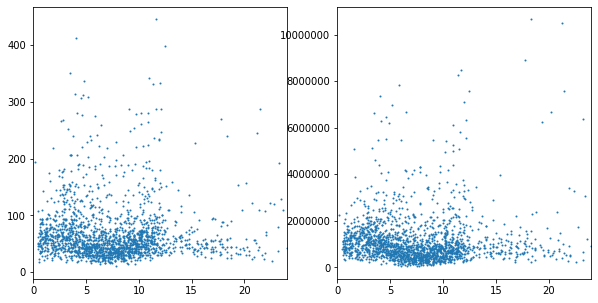

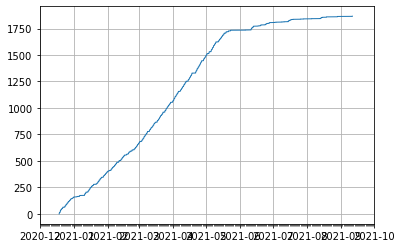

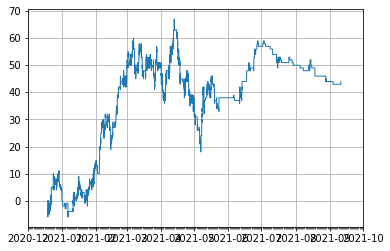

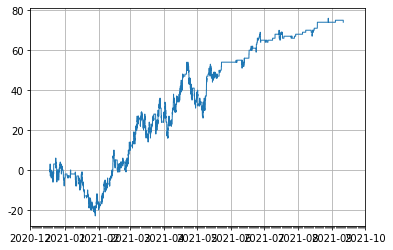

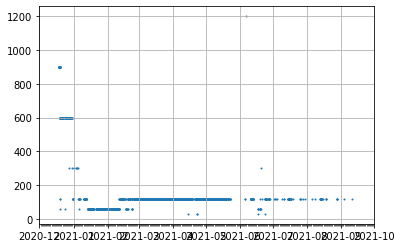

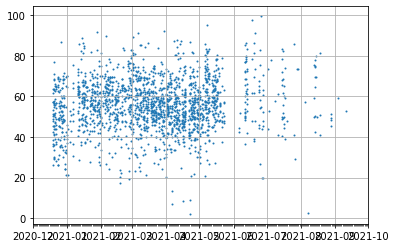

In [5]:
import datetime
import dateutil.parser
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

x = df["date"]
x = [dateutil.parser.parse(xe) for xe in x]
x = [xe.replace(tzinfo=None) for xe in x]
x = [np.datetime64(xe)-np.datetime64(xe, 'D') for xe in x]
x = [xe/np.timedelta64(1, 'h') for xe in x]
x = [(xe+9)%24 for xe in x]
y = df["win_tu"]+df["los_tu"]
ax1.scatter(x, y, s=1)
ax1.set_xlim(0, 24)
ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

x = df["date"]
x = [dateutil.parser.parse(xe) for xe in x]
x = [xe.replace(tzinfo=None) for xe in x]
x = [np.datetime64(xe)-np.datetime64(xe, 'D') for xe in x]
x = [xe/np.timedelta64(1, 'h') for xe in x]
x = [(xe+9)%24 for xe in x]
y = df["win_tp"]+df["los_tp"]
ax2.scatter(x, y, s=1)
ax2.set_xlim(0, 24)
ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plot_helper.plot_datetimes_vs_value(bet_count_data)
plot_helper.plot_datetimes_vs_value(winlos_data)
plot_helper.plot_datetimes_vs_value(streak_data)

plot_helper.plot_timeseries(
    df["date"],
    df["prediction_window"],
    scatter=True
    )
plot_helper.plot_timeseries(
    df["date"],
    df["win_tp"]/(df["win_tp"]+df["los_tp"])*100,
    scatter=True
    )


In [6]:
percentages = df["win_tp"]/(df["win_tp"]+df["los_tp"])*100
percentages.describe()


count    1866.000000
mean       55.831295
std        12.776197
min         2.092398
25%        48.364488
50%        55.912810
75%        63.746810
max        99.544947
dtype: float64

In [7]:
titles = df["title"]
titles_counts = titles.value_counts()
titles_counts[:10]


승리 패배 예측하기 방장잘못누르는거까지 예상해서        1191
승리 패배                              278
승리 패배 [주인장이 잘못누를거까지 예상해서 고르시오]     267
승패 예측하기 내가 잘못누르는거까지 예상해서            71
T1 vs DK                             7
보스 성공 실패 5트                          4
첫용                                   4
방장 픽순서 홀짝                            4
승리 패배 예측하기 내가잘못누르는거까지 예상해서           3
af vskt                              3
Name: title, dtype: int64